In [12]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time


#I/O 
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_12_02/'
spectra_filename    =   'NO_ARS_12_02'
VIPA_filename       =   'NO_ARS_12_02_VIPA_quasisat.tif'
log_file            =   'log_'+spectra_filename
analysis_dir        =   'analysis_new_cut_delta_lorentian/'

#operatives

#esclusi a mano
to_add              =   []

syg_kwargs          =   {'height': 119, 'distance': 31, 'width': 3.}
syg_kwargs_VIPA     =   {'distance':70, 'width': 1}
syg_kwargs_brill    =  {'height': 23, 'distance': 31, 'width': 3.}
VIPA_treshold       =   6
sat_height          =   50000
sat_width           =   13.5
almost_treshold     =   15000


#quanto mi allontano dal VIPA
pre_cut             =   False
cut                 =   True
dist_01 = 37
dist_23 = 34
#markov_fit
recover_markov = False
rules_markov_bound     =   ('positive', 0.2, 'positive', [-2,2], 'positive', 'positive', 0.2, 0.015, 0.0025, 'inf', 'inf')

#tot fit
percents_tot        = (0.2, 0.1, 0.5, 'positive', 'positive', 0.15,  0.15, 0.15, np.inf, np.inf)
############


cols_smart  =  ('Co', 'Omega', 'Gamma', 'delta_position',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_basic  = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude')
cols        = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position',  'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')

#markov_fit
p0_normal = np.array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.448930518e-01,  8.34614271,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])
p0_brillouin = np.array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.48930518e-01,  2.34614271e-01,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])
p0_almost = np.array([ 1.07186924e-01,  7.63051819e+00,  1.33280055e-01,  1.97510814e+00,
        5.09986043e-01,  1.66616101e+00,  4.33362727e+03, -1.00496864e+01,
        1.59365161e+01,  2.77695117e-01,  6.43211621e+00])

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


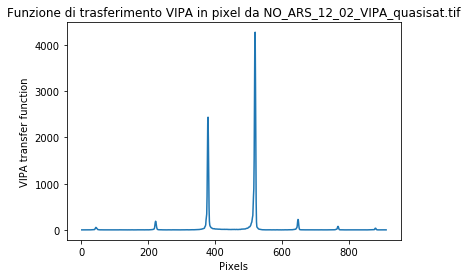

Text(0.5, 1.0, '(0, 0)')

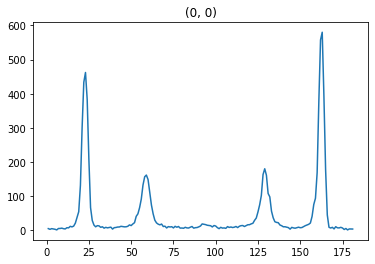

In [13]:
#0) importo dati e inizializzo oggetti
i   =   0
j   =   0
y    =   Import_from_Matlab(spectra_filename, now_path, var_name = 'y3')[i][j]
Data    =   Exp.Spectrum(name = str((i,j)))
Data.Get_Spectrum(y = np.resize(y, np.max(y.shape)), offset = 183., cut = pre_cut, cut_range = (10, 175))
Data.Get_Spectrum_Peaks(**syg_kwargs)
Data.Get_VIPA_tif(VIPA_filename, now_path, fig = 'VIPA_img', save_path = now_path)

plt.figure()
plt.plot(Data.x, Data.y)
plt.title(str((i,j)))

Lo spettro è normal
Lo spettro ha 4 picchi


Text(0.5, 1.0, '(0, 0)')

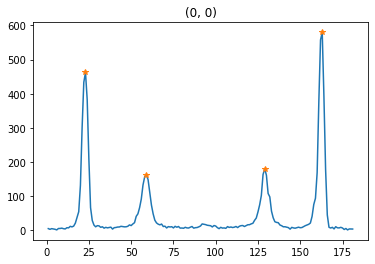

In [14]:
#1) Classificazione e visualizzazione spettro
check = Data.Check_Spectrum_Saturation(saturation_height = sat_height, saturation_width = sat_width)

if      check == 1  : nature    = 'saturo'
elif    (Data.n_peaks == 2) :

    Data.Get_Spectrum_Peaks(**syg_kwargs_brill)
    if (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][1]]) & (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][3]]):
        nature    = 'brillouin_highest_dx'
    elif (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][2]]) & (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][0]]):
        nature    = 'brillouin_highest_sx'
    else:
        raise ValueError ('Non ho riconosciuto lo spettro\n')

elif (Data.n_peaks == 3) :
    Data.Get_Spectrum_Peaks(**syg_kwargs_brill) 
    nature = 'brillouin_higher'

elif Data.y.max() > almost_treshold:
    nature = 'almost_height'
else:                 nature    = 'normal'
print('Lo spettro è '+nature)
print('Lo spettro ha {} picchi'.format(Data.n_peaks))
plt.figure()
plt.plot(Data.x, Data.y)
plt.plot(Data.x[Data.peaks['idx']], Data.y[Data.peaks['idx']], '*')
plt.title(str((i,j)))

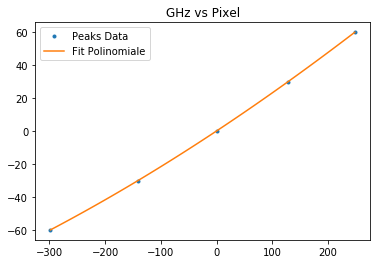

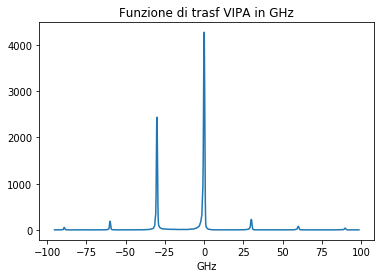

In [15]:
#2) Operazioni di conversione in GHz

Data.How_Many_Peaks_To_VIPA(treshold = VIPA_treshold, **syg_kwargs_VIPA)
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig = True)


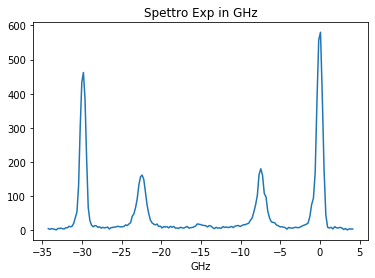

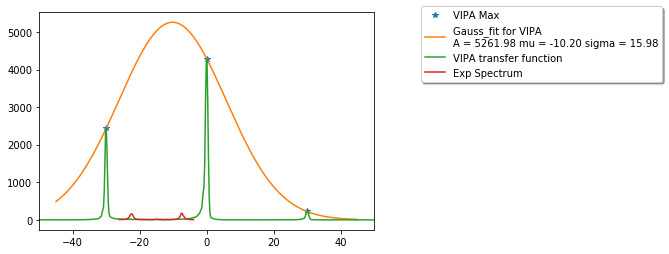

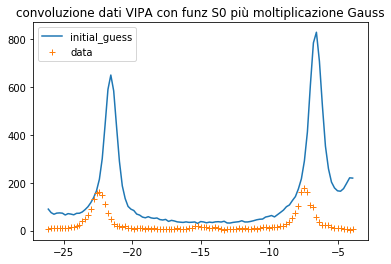

In [16]:
#3) Eseeguo taglio e stima parametri iniziali spettro, verifichepositive
Data.Align_Spectrum()
Data.Spectrum_Pix2GHz(fig = True)
Data.Cut_n_Estimate_Spectrum(estimate = True, cut = cut, mean_dist01 = dist_01, mean_dist23 = dist_23, verbose = True)
Data.Fit_VIPA_Gaussian(fig = True)
p0 = Data.p0[list(cols_mark)].values[0]
#p0 = np.array([ 1.00000000e+00,  7.58814822e+00,  1.00000000e-01,  0.00000000e+00,        1.00000000e-01,  1.00000000,  5.26197998e+03, -1.02027273e+01,     1.59764572e+01,  0.00000000e+00,  0.00000000e+00])
_ = Data.Gauss_Convolve_Markovian_Response(p0, fig = True, compare = True)

In [1]:
Data.p0[list(cols_mark)]

NameError: name 'Data' is not defined

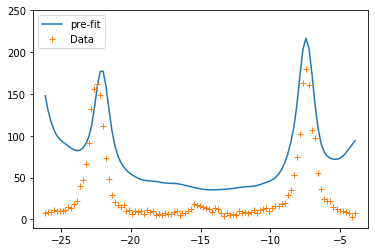

In [17]:
p0 = np.array([ 1.08633225e-01,  7.70983143e+00,  1.58967633e-01,  1.70455195e+00,
        6.40427573e-01,  2.20351667e+00,  5.23638443e+03, -10.18245455e+00,
        1.5973788115e+01,  2.73907418e-01,  8.73821212e+00])
plt.figure()
plt.plot(Data.x_freq, Data.Gauss_Convolve_Markovian_Response_Fast(p0), label = 'pre-fit' )
plt.plot(Data.x_freq, Data.y, '+', label = 'Data')
plt.xlim(-27, -3)
plt.ylim(-10, 250)
plt.legend()


Cost before fitting = 1086.3281583362532
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0863e+03                                    2.02e+04    
       1              6         3.2420e+02      7.62e+02       5.04e-01       1.45e+03    
       2              7         1.1830e+02      2.06e+02       9.54e-01       6.50e+02    
       3              8         8.3895e+01      3.44e+01       2.00e+00       6.52e+01    
       4              9         7.9123e+01      4.77e+00       1.04e+02       5.81e+01    
       5             10         7.6180e+01      2.94e+00       1.19e+02       2.51e+02    
       6             13         7.5622e+01      5.58e-01       2.64e-01       1.72e+01    
       7             16         7.5045e+01      5.77e-01       1.50e-02       6.15e+01    
       8             17         7.4056e+01      9.88e-01       3.01e-02       8.49e+01    
       9             18         7.3468e+01      5

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.086837,7.495617,0.099903,0.624201,0.013369,12.868333,6.314190e+03,-10.049686,15.936516,0.152371,5.136705
StdErrs,0.211086,0.039406,0.014756,0.000429,0.001468,6.800759,1.644381e+10,39.592457,56.832972,0.035893,1.582861
Initials,0.010000,7.478667,0.100000,0.000000,0.100000,1.000000,5.261980e+03,-10.202727,15.976457,0.000000,0.000000


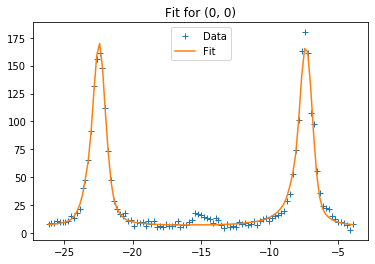

In [18]:
#3) fit markoviano
rules_markov_bound     =   ('positive', 0.2, 'positive', [-2,2], 'positive', 'positive', 0.2, 0.015, 0.0025, 'inf', 'inf')

p0s = [Data.p0[list(cols_mark)].values[0], p0_almost, p0_brillouin, p0_normal]
Data.Get_Best_p0(p0s, cols_mark)
Data.Get_cost_markov(Data.p0[list(cols_mark)].values[0], columns = cols_mark)
print('Cost before fitting = {}'.format(Data.cost_markov))
Data.Get_Fit_Bounds(rules_markov_bound, cols_mark)
_= Data.Non_Linear_Least_Squares_Markov(cols_mark, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, max_nfev = 200, fig = True, zoom = False)
#_ = Data.Non_Linear_Least_Squares_Markov(bound = (Data.bounds['down'].values, Data.bounds['up'].values),  max_nfev = 500)
Data.Get_cost_markov(Data.Markov_Fit_Params.values[0], columns = cols_mark)
print('Cost after fitting = {}\n'.format(Data.cost_markov))
Data.Markov_Fit_Params

In [19]:
Data.p0.T.Values[list(cols_gauss)] = np.array([23, 12, 3])

Co     Omega  Gamma  delta_position  delta_width  delta_amplitude  \
Values  0.01  7.478667    0.1             0.0          0.1                1   

                  A         mu      sigma  shift  offset  
Values  5261.979978 -10.202727  15.976457    0.0       0  
               Co    Omega      Gamma delta_position delta_width  \
Values  0.0868369  7.49562  0.0999032       0.624201   0.0133689   

       delta_amplitude        A       mu    sigma     shift  offset  
Values         12.8683  6314.19 -10.0497  15.9365  0.152371  5.1367  
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0599e+02                                    3.66e+01    
       1              2         8.1661e+01      2.43e+01       3.02e+00       4.99e+01    
       2              3         7.9333e+01      2.33e+00       1.30e+01       3.59e+01    
       3              4         7.7956e+01      1.38e+00       4.40e+01       7.68e+00    
 

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,shift,offset
Values,0.099191,7.482875,0.098904,2.781628e-11,44.232804,2.000000,0.013235,12.739649,0.125847,2.932952
StdErrs,0.056681,4.304082,0.050815,7.095185e+02,223092.290047,18.896429,0.047202,14.973242,0.016569,6.586021
Initials,0.086837,7.495617,0.099903,9.990324e-02,1.000000,0.624201,0.013369,12.868333,0.152371,5.136705


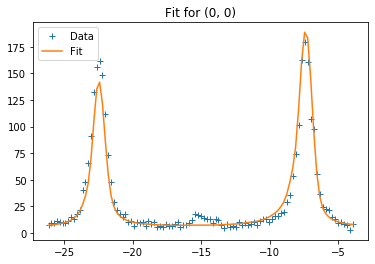

In [20]:
#4) fit totale
rules_tot_bounds                    =   (0.2, 0.01, 0.01, 'positive', 'positive', [-2,2], 0.01, 0.01, 'inf', 'inf')
print(Data.p0[list(cols_mark)])
Data.Initials_Parameters_from_Markov(Data.Markov_Fit_Params, cols_mark)
print(Data.p0[list(cols_mark)])
Data.Get_Fit_Bounds(rules_tot_bounds, columns = cols_real)
p_gauss = Data.Markov_Fit_Params[list(cols_gauss)].values[0]
#Data.Get_p0(Data.p0[list(cols_real)].values[0], cols_real)
Data.Non_Linear_Least_Squares(p_gauss, cols_real, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, fig = True, max_nfev = 50)
Data.Tot_Fit_Params

In [29]:
Data.Markov_Fit_Params

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.086837,7.495617,0.099903,0.624201,0.013369,12.868333,6.314190e+03,-10.049686,15.936516,0.152371,5.136705
StdErrs,0.211086,0.039406,0.014756,0.000429,0.001468,6.800759,1.644381e+10,39.592457,56.832972,0.035893,1.582861
Initials,0.010000,7.478667,0.100000,0.000000,0.100000,1.000000,5.261980e+03,-10.202727,15.976457,0.000000,0.000000


In [27]:
Data.Tot_Fit_Params

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,shift,offset
Values,0.099191,7.482875,0.098904,2.781628e-11,44.232804,2.000000,0.013235,12.739649,0.125847,2.932952
StdErrs,0.056681,4.304082,0.050815,7.095185e+02,223092.290047,18.896429,0.047202,14.973242,0.016569,6.586021
Initials,0.086837,7.495617,0.099903,9.990324e-02,1.000000,0.624201,0.013369,12.868333,0.152371,5.136705


In [28]:
Data.Markov_Fit_Params

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.086837,7.495617,0.099903,0.624201,0.013369,12.868333,6.314190e+03,-10.049686,15.936516,0.152371,5.136705
StdErrs,0.211086,0.039406,0.014756,0.000429,0.001468,6.800759,1.644381e+10,39.592457,56.832972,0.035893,1.582861
Initials,0.010000,7.478667,0.100000,0.000000,0.100000,1.000000,5.261980e+03,-10.202727,15.976457,0.000000,0.000000


In [24]:
p0  = Data.p0
Markov_Fit_Params = Data.Markov_Fit_Params
p0

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.0868369,7.49562,0.0999032,0.0999032,1.0,0.624201,0.0133689,12.8683,6314.19,-10.0497,15.9365,0.152371,5.1367


In [25]:
p0[list(cols_mark)].update(Markov_Fit_Params)
p0

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.0868369,7.49562,0.0999032,0.0999032,1.0,0.624201,0.0133689,12.8683,6314.19,-10.0497,15.9365,0.152371,5.1367


In [26]:
p0

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.0868369,7.49562,0.0999032,0.0999032,1.0,0.624201,0.0133689,12.8683,6314.19,-10.0497,15.9365,0.152371,5.1367
